### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os

# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.metrics import accuracy_score, confusion_matrix #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

### Loading data

In [2]:
data = pd.read_csv('dataset/diabetes.csv') # Reading the dataset

### Analysing the data

In [3]:
print(f'Shape of the dataset : {data.shape}')
# Identifying the shape of the data which gives information related to number of records present in the dataset. 

Shape of the dataset : (392, 9)


- **Dataset consits of 392 records and 9 columns.**

In [4]:
data.columns # Lets check the feature and target variables present in the dataset

Index(['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'diabetes', 'age', 'result'],
      dtype='object')

- **Datset consists of some of the required information related to the glucose, insulin in body, bmi index etc., of a person. We can use this information and identify that the person is having Diabetes (or) not.**

In [5]:
target = "result" # lets define the target with the target variable name

### Lets see some sample data


In [6]:
data.head(3) # Prints the 3 records from the dataset

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,result
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1


### Lets check for nan values

In [7]:
data.isna().sum()

pregnant     0
glucose      0
diastolic    0
triceps      0
insulin      0
bmi          0
diabetes     0
age          0
result       0
dtype: int64

- **We can see here that there are no nan values present in the dataset.**

In [8]:
data.info() # Describes the data related information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   392 non-null    int64  
 1   glucose    392 non-null    int64  
 2   diastolic  392 non-null    int64  
 3   triceps    392 non-null    int64  
 4   insulin    392 non-null    int64  
 5   bmi        392 non-null    float64
 6   diabetes   392 non-null    float64
 7   age        392 non-null    int64  
 8   result     392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 27.7 KB


- **All the columns in the dataset are of type "int" (or) "float". As there is no categorical column in the dataset we don't perform any Encoding techniques.**

In [9]:
data.describe() # Decribes the features int eh dataset wiht some required information

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,result
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Analysing the target variable

In [10]:
data[target].value_counts()

0    262
1    130
Name: result, dtype: int64

- **We can see that we have 262 records for class '0' and 130 records for class "1". We need to perform startify for this type of data.**

### Visualizing dataset

In [11]:
data.columns

Index(['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'diabetes', 'age', 'result'],
      dtype='object')

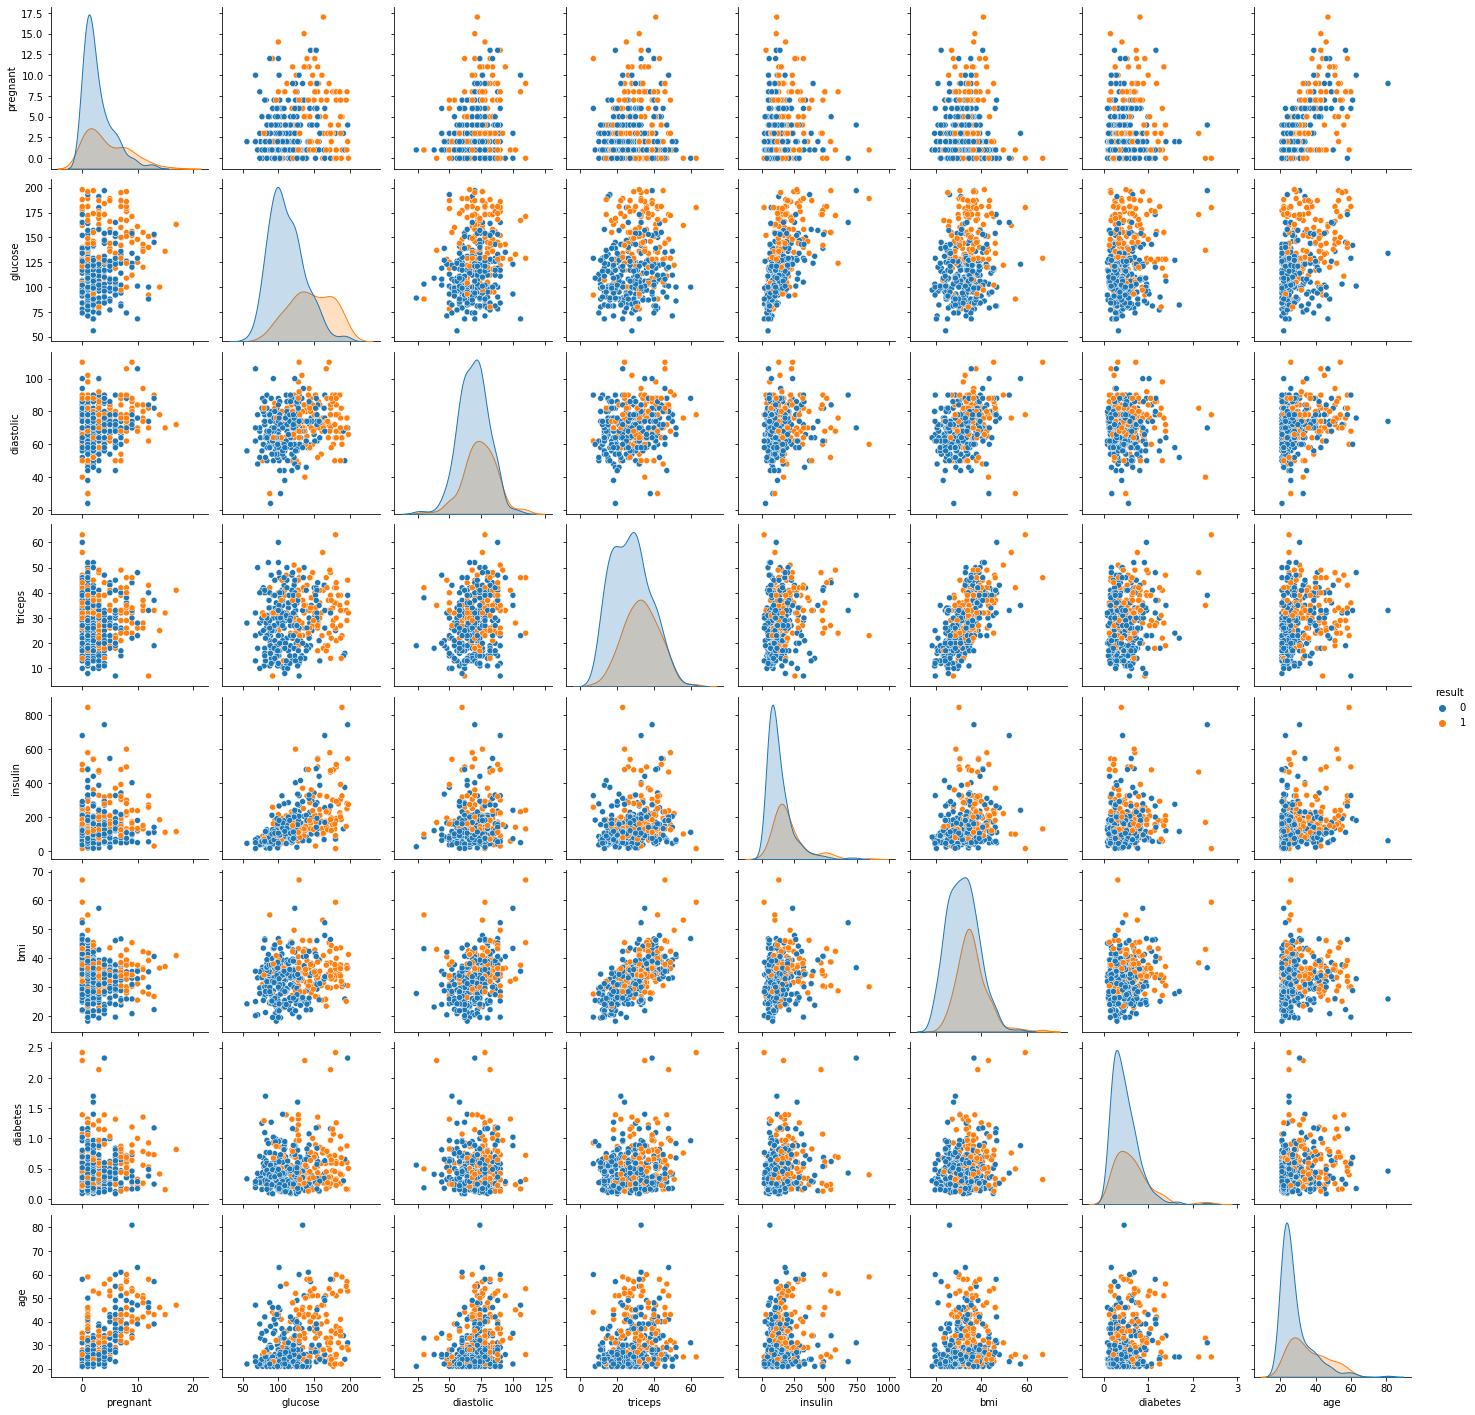

In [12]:
sns.pairplot(data, hue="result")

- **We can see in the above plot how the features are distributed in teh dataset.**
- **Blue colour is related to class "0" and Orange colour is related to class "1".** 

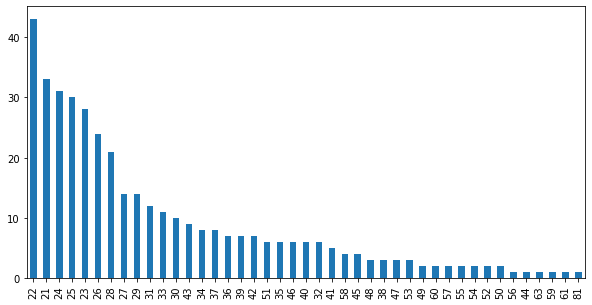

In [13]:
# Distribution of age in the dataset
plt.figure(figsize=(10,5))
data['age'].value_counts().plot(kind='bar')

### Lets check the correlation betweent the features in the dataset

In [14]:
data.corr()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,result
pregnant,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
diastolic,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
triceps,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
bmi,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
diabetes,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
result,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


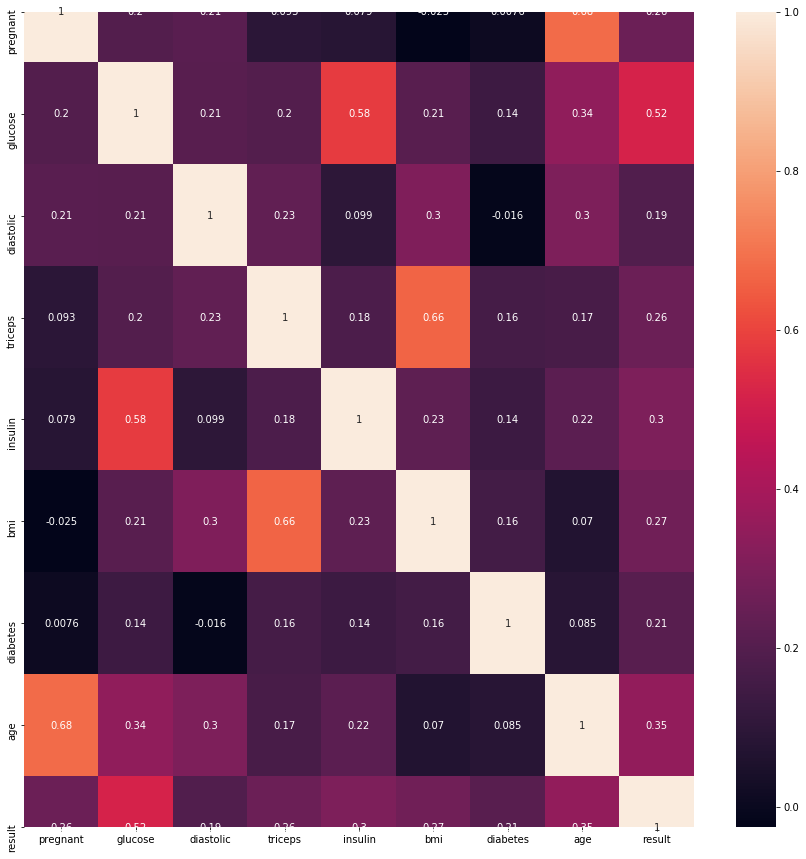

In [15]:
# Lets see the heatmap for the correlation
plt.figure(figsize=(15,15)) 
sns.heatmap(data.corr(),annot=True) #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

- **We can observe a slight correlation between som e features from the heatmap.**

In [16]:
features = list(data.columns)
print(len(features))
features = [i for i in features if i!=target]
print(len(features))

9
8


In [17]:
# Splitting the dataset into train and test set with 80% in train and 20% in test to validate the model
train, test = train_test_split(data, test_size = 0.2, shuffle=True, random_state=42, stratify=data[target])

print(f'Shape of train dataset : {train.shape}') # getting train data shape
print(f'Shape of train dataset : {test.shape}') # getting test data shape

Shape of train dataset : (313, 9)
Shape of train dataset : (79, 9)


In [18]:
train[target].value_counts()

0    209
1    104
Name: result, dtype: int64

In [19]:
test[target].value_counts()

0    53
1    26
Name: result, dtype: int64

In [20]:
train_X = train[features]# taking the training data features
train_y=train[target]# output of our training data
test_X= test[features] # taking test data features
test_y =test[target]   #output value of test data

### Lets perform the Logistic regression

In [21]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Logistic Regression is : {accuracy*100}%')

The accuracy of the Logistic Regression is : 81.0126582278481%


In [22]:
pd.DataFrame(confusion_matrix(prediction,test_y), columns=[0,1], index=[0,1])

,0,1
0,46,8
1,7,18


### Trianing the model using the Decision Tree

In [23]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Decision Tree is : {accuracy*100}%')

The accuracy of the Decision Tree is : 73.41772151898735%


In [24]:
pd.DataFrame(confusion_matrix(prediction,test_y), columns=[0,1], index=[0,1])

,0,1
0,42,10
1,11,16


In [25]:
model = RandomForestClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Random Forest Classifier is : {accuracy*100}%')

The accuracy of the Random Forest Classifier is : 75.9493670886076%


In [26]:
model = RandomForestClassifier(n_estimators=30, random_state=24)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Random Forest Classifier is : {accuracy*100}%')

The accuracy of the Random Forest Classifier is : 84.81012658227847%


In [27]:
pd.DataFrame(confusion_matrix(prediction,test_y), columns=[0,1], index=[0,1])

,0,1
0,48,7
1,5,19


### OBSERVATIONS

   - **We have trained a diabetes dataset using different machine learning models.**
   - **The dataset is small and has two values in teh target variable. So, Performed the classification task.**
   - **rained the model using the Logistic regression model, Random Forest Classifier and Decision tree algorithm.**
   - **Random Forest Classifier performed better compared to all other models.**
   - **Experimented by changing some arguments in random forest and the performance of the model is improved.**
   - **We can do some feature extraction techiniques and preprocessing techniques to improve the performance of the model.**